<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Методы машинного обучения</center></h1>
<h2><center>Семинар: методы сжатия признаков</center></h2>
<h2><center>Введение в NLP</center></h2>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Методы понижения размерности

In [3]:
# Load data
df_wine = pd.read_csv('data/winequality-red.csv', sep=';')

# Make classification target feature
df_wine.loc[:, 'quality_cat'] = (df_wine.quality > 5).astype(int)
df_wine = df_wine.drop('quality', axis=1)

# Get descriptive and target features
X = df_wine.iloc[:, :-1].values
y = df_wine.iloc[:, -1].values

## PCA

Попробуем получить PCA разными способами

## PCA через sklearn

In [4]:
from sklearn.decomposition import PCA

In [6]:
X.shape

(1599, 11)

In [5]:
pca = PCA(n_components=5, random_state=123)

In [7]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
Z = pca.transform(X)

In [9]:
Z.shape

(1599, 5)

In [11]:
pca.components_.shape

(5, 11)

In [12]:
Z[:5]

array([[-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902],
       [ 22.03772361,   4.40832155,  -0.31037799,  -0.19993774,
         -0.55710939],
       [  7.16267333,  -2.50146086,  -0.5818683 ,  -0.21906928,
         -0.55293355],
       [ 13.43006283,  -1.95112215,   2.63403954,  -1.5740594 ,
         -0.06380573],
       [-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902]])

In [17]:
X.mean(axis=0)

array([ 8.31963727,  0.52782051,  0.27097561,  2.5388055 ,  0.08746654,
       15.87492183, 46.46779237,  0.99674668,  3.3111132 ,  0.65814884,
       10.42298311])

In [15]:
pca.mean_

array([ 8.31963727,  0.52782051,  0.27097561,  2.5388055 ,  0.08746654,
       15.87492183, 46.46779237,  0.99674668,  3.3111132 ,  0.65814884,
       10.42298311])

In [18]:
X_ = X - X.mean(axis=0)

In [19]:
Z_ = X_.dot(pca.components_.T)

In [20]:
Z_[:5]

array([[-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902],
       [ 22.03772361,   4.40832155,  -0.31037799,  -0.19993774,
         -0.55710939],
       [  7.16267333,  -2.50146086,  -0.5818683 ,  -0.21906928,
         -0.55293355],
       [ 13.43006283,  -1.95112215,   2.63403954,  -1.5740594 ,
         -0.06380573],
       [-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902]])

In [21]:
# А теперь еще и шкалируем признаки

X = (X - X.mean(axis=0))/X.std(axis=0)

In [22]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837])

## PCA через ковариационную матрицу

In [29]:
from numpy.linalg import eig

In [28]:
C = X.T.dot(X)

In [31]:
lambd, W = eig(C)

In [32]:
lambd

array([4955.51277263, 3079.52959367, 2479.31903855, 1939.95881639,
       1533.90802208,   95.23374076,  289.95173334,  551.08274479,
        676.30776275,  933.48215949, 1054.71361553])

In [40]:
W.T[:2]

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096]])

In [41]:
W = W.T[:5, :]

In [39]:
pca.components_[:2]

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096]])

In [42]:
Z = pca.transform(X)

In [43]:
Z_ = X.dot(W.T)

In [45]:
Z[:3]

array([[-1.61952988,  0.45095009, -1.77445415,  0.04374031,  0.06701448],
       [-0.79916993,  1.85655306, -0.91169017,  0.54806597, -0.01839156],
       [-0.74847909,  0.88203886, -1.17139423,  0.41102067, -0.04353101]])

In [46]:
Z_[:3]

array([[-1.61952988,  0.45095009, -1.77445415,  0.04374031,  0.06701448],
       [-0.79916993,  1.85655306, -0.91169017,  0.54806597, -0.01839156],
       [-0.74847909,  0.88203886, -1.17139423,  0.41102067, -0.04353101]])

In [47]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837])

In [49]:
exp_var = lambd/lambd.sum()
exp_var

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.00541439, 0.01648483, 0.0313311 , 0.03845061, 0.05307193,
       0.05996439])

## Оценка качества при разных количествах компонент

Реализуйте 2 пайплайна:
    * StandartScaler + LogisticRegression
    * StandartScaler + PCA + LogisticRegression

Оцените качество пайплайна с PCA при разных количествах компонент и сравните его с первым

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [51]:
model1 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [52]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

In [55]:
score_model1 = cross_val_score(model1, X, y, cv=cv, scoring='roc_auc').mean()
score_model1

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

0.8171715339500574

In [58]:
from sklearn.model_selection import validation_curve

In [59]:
k_range = range(1, 12)
scores = []

for k in k_range:
    model2 = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=k)),
        ('clf', LogisticRegression())
    ])

    scores.append(cross_val_score(model2, X, y, cv=cv, scoring='roc_auc').mean())

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

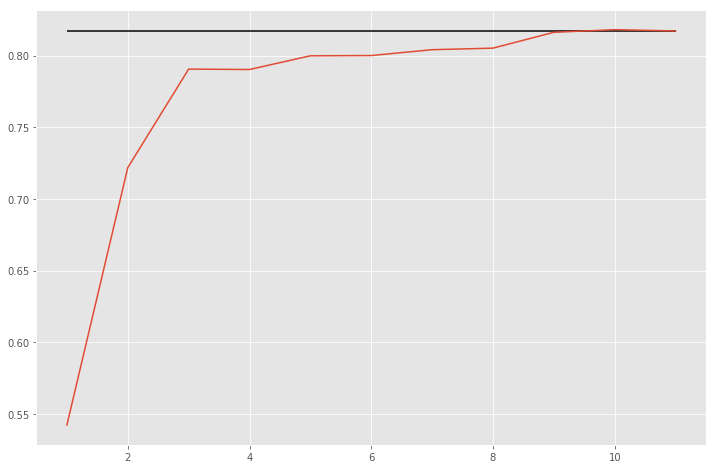

In [62]:
plt.plot(k_range, scores)
plt.hlines(score_model1, 1,11)

## Singular Value Decomposition

Для любой матрицы $A$ размера $n \times m$ и ранга $r$ можно найти разложение вида:
$$ A = U \Sigma V^\top ,$$
где 
* $U$ - унитарная матрица, состоящая из собственных векторов $AA^\top$
* $V$ - унитарная матрица, состоящая из собственных векторов $A^\top A$
* $\Sigma$ - диагональная матрица с сингулярными числами $s_i = \sqrt{\lambda_i}$

<center><img src='img/svd.jpg' width=600></center>

## SVD via PCA
Матрицы $U$ и $V$ ортогональны и могут быть использованы для перехода к ортогональному базису:
$$ AV = U\Sigma $$

<center><img src='img/pca_svd.png' width=600></center>

In [ ]:
from numpy.linalg import svd

## Рационы питания в странах

* Загрузите набор данных о пищевом рационе в разных странах мира `diet.csv`
* Примените на данных PCA с 2 компонентами
* Изобразите объекты в сжатом пространстве

In [63]:
df = pd.read_csv('data/diet.csv', sep=';')

In [64]:
df.head()

,Countries,Energy (kcal/day),Protein (g/day),Fats (g/day),Carbohydrates (g/day),Animal Products + (kcal/day),Animal Fats (kcal/day),Bovine Meat (kcal/day),"Butter, Ghee (kcal/day)",Cheese (kcal/day),...,Starchy Roots (kcal/day),Sugar & Sweeteners (kcal/day),Sugar (Raw Equivalent) (kcal/day),"Sugar, Raw Equivalent (kcal/day)","Sugar, Refined Equiv (kcal/day)",Vegetable Oils (kcal/day),Vegetables (kcal/day),Wheat (kcal/day),Wine (kcal/day),Unnamed: 50
0,Albania,2860.0,96,86,425.50,813.0,49,62,11,50,...,57,193,187,191,187,174,94,1166,6,NaN
1,Argentina,2980.0,94,100,426.00,823.0,72,342,28,90,...,100,406,337,405,337,311,51,914,59,NaN
2,Australia,3120.0,107,134,371.50,1033.0,124,142,62,107,...,87,423,407,415,407,435,67,559,39,NaN
3,Austria,3740.0,111,162,459.50,1219.0,320,59,102,193,...,113,437,404,424,404,442,61,617,55,NaN
4,Bangladesh,2200.0,48,25,445.75,65.0,5,5,3,0,...,42,59,29,59,29,131,10,180,0,NaN


In [68]:
X = df.iloc[:, 1:-1].values

In [70]:
X_ = (X - X.mean(axis=0))/X.std(axis=0)
pca = PCA(n_components=2, random_state=123)

In [74]:
# pca.fit(X_)
# Z = pca.transform(X_)
Z = pca.fit_transform(X_) # Сразу fit на X а потом его transform

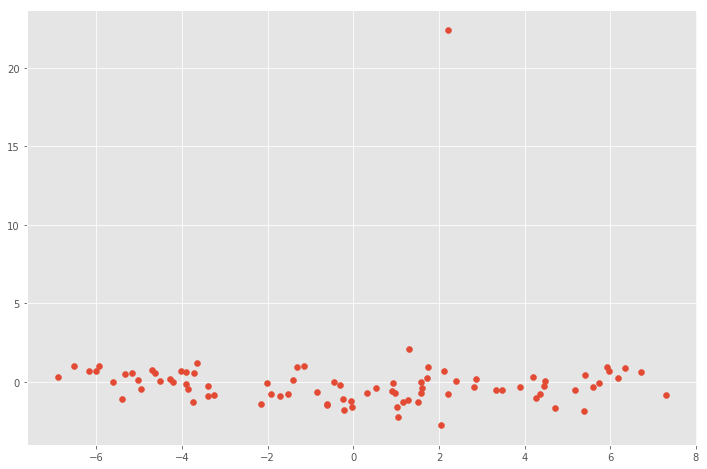

In [73]:
plt.scatter(Z[:,0], Z[:,1])

In [75]:
idx = Z[:, 1] > 20

In [110]:
strange = df.loc[idx].values[0,1:-1]

In [111]:
field_names = df.columns[1:-1].values

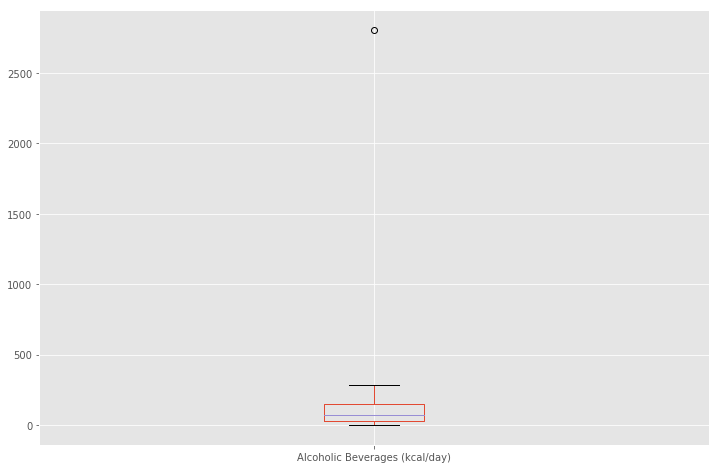

In [120]:
df.loc[:, 'Alcoholic Beverages (kcal/day)'].plot(kind='box')

In [117]:
field_names

array(['Energy (kcal/day)', 'Protein (g/day)', 'Fats (g/day)',
       'Carbohydrates (g/day)', 'Animal Products + (kcal/day)',
       'Animal Fats (kcal/day)', 'Bovine Meat (kcal/day)',
       'Butter, Ghee (kcal/day)', 'Cheese (kcal/day)', 'Eggs (kcal/day)',
       'Fats, Animals, Raw (kcal/day)', 'Fish, Seafood (kcal/day)',
       'Freshwater Fish (kcal/day)', 'Honey (kcal/day)',
       'Meat (kcal/day)', 'Milk - Excluding Butter (kcal/day)',
       'Milk, Whole (kcal/day)', 'Mutton & Goat Meat (kcal/day)',
       'Offals, Edible (kcal/day)', 'Pelagic Fish (kcal/day)',
       'Pigmeat (kcal/day)', 'Poultry Meat (kcal/day)',
       'Vegetal Products + (kcal/day)', 'Alcoholic Beverages (kcal/day)',
       'Apples (kcal/day)', 'Bananas (kcal/day)', 'Beans (kcal/day)',
       'Cereals - Excluding Beer (kcal/day)', 'Coconut Oil (kcal/day)',
       'Coffee (kcal/day)', 'Fruits - Excluding Wine (kcal/day)',
       'Nuts (kcal/day)', 'Olive Oil (kcal/day)', 'Palm Oil (kcal/day)',
       'Pot

In [112]:
d = X - strange

In [116]:
pd.Series(index=field_names, data=d.mean(axis=0)).sort_values()

Protein (g/day)                        -2973.47
Alcoholic Beverages (kcal/day)         -2685.57
Coconut Oil (kcal/day)                 -1799.71
Wine (kcal/day)                        -1435.55
Nuts (kcal/day)                         -208.36
Animal Fats (kcal/day)                 -199.267
Roots & Tuber Dry Equiv (kcal/day)     -184.116
Vegetables (kcal/day)                  -138.791
Rice (Paddy Equivalent) (kcal/day)     -77.0349
Pulses (kcal/day)                      -44.0116
Mutton & Goat Meat (kcal/day)          -35.9651
Offals, Edible (kcal/day)               -31.907
Bananas (kcal/day)                     -19.3605
Olive Oil (kcal/day)                   -18.5581
Soyabean Oil (kcal/day)                -9.47674
Freshwater Fish (kcal/day)             -6.88372
Honey (kcal/day)                      -0.337209
Cheese (kcal/day)                        2.7907
Coffee (kcal/day)                       2.82558
Butter, Ghee (kcal/day)                     3.5
Bovine Meat (kcal/day)                  

* Скорее всего вы обнаружите некоторые выбросы, с этим ничего не поделать - PCA чувствителен к выбросам
* Удалите объекты-выборосы и повторите процедуру

# PCA для текстов
#### Он же Latent Semantic Index или Latent Semantic Allocation

* Когда мы работаем с текстами, бы обычно переходим к модели мешка слов
* Что если мы ходим применить для текстов PCA?
* Центрировать данные мы не можем, так как тогда наша огромная матрица с признаками будет плотной, а значит будет очень много весить
* Давайте не будем центрировать! =D

In [121]:
from sklearn.decomposition import TruncatedSVD

In [122]:
df = pd.read_csv('data/sentiment/imdb_labelled.txt', sep='\t', header=None, names=['text', 'label'])

In [123]:
df.head()

,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [124]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [125]:
text = df.text.values

In [126]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text)

In [128]:
text.shape

(748,)

In [129]:
X

<748x3047 sparse matrix of type '<class 'numpy.int64'>'
	with 11363 stored elements in Compressed Sparse Row format>

In [127]:
X.shape

(748, 3047)

In [135]:
pcaish = TruncatedSVD(n_components=3, random_state=123)
pca = PCA(n_components=3, random_state=123)
Z = pcaish.fit_transform(X)
# Z = pca.fit_transform(X)

In [136]:
Z

array([[ 0.27923403,  0.00931181, -0.19921826],
       [ 2.00479625, -0.22796059, -0.33735339],
       [ 3.35993389, -1.24344591,  1.14540515],
       ...,
       [ 0.56845862,  0.75834051,  0.25123094],
       [ 0.04048141, -0.1155508 , -0.02562375],
       [ 1.15704622, -0.18584428,  0.11468745]])

In [138]:
model = Pipeline([
    ('vect', CountVectorizer(max_df=0.95, stop_words='english', ngram_range=(1,1))),
    ('pca', TruncatedSVD(n_components=3, random_state=123)),
    ('clf', LogisticRegression())
])

In [139]:
label = df.label.values

In [140]:
model.fit(text, label)

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
       ...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

# T-SNE

#### Задание
Сожмите признаковое пространство данных с цифрами с помощью tsne.

In [141]:
from sklearn.datasets import load_digits

In [142]:
data = load_digits()

In [144]:
labels = data['target']

In [146]:
imgs = data['images']

In [ ]:
plt.imshow(imgs[1], cmap=plt.cm.gray_r)

In [151]:
X = data['data']

In [152]:
X.shape

(1797, 64)

In [153]:
from sklearn.manifold import TSNE

In [166]:
tsne = TSNE(perplexity=5,)

In [167]:
tsne.fit(X)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=5,
   random_state=None, verbose=0)

In [168]:
Z = tsne.embedding_

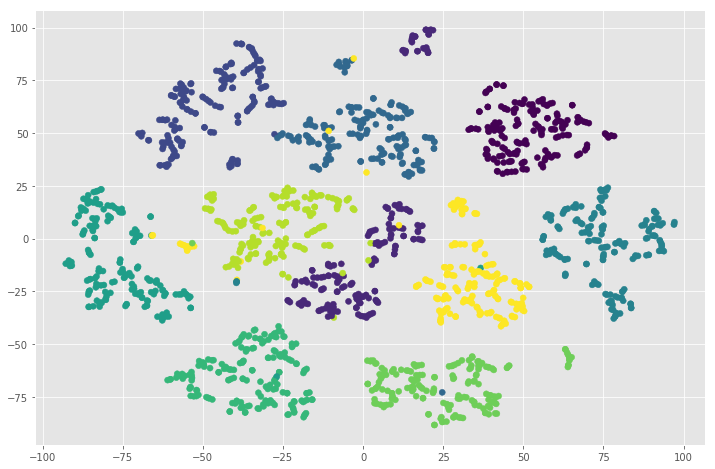

In [169]:
plt.scatter(Z[:, 0], Z[:, 1], c=labels)

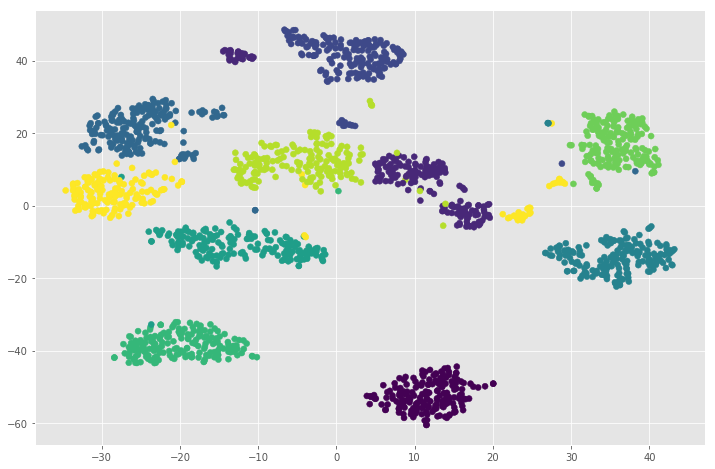

In [165]:
plt.scatter(Z[:, 0], Z[:, 1], c=labels)